In [4]:
import numpy as np
import itertools
import pickle

from scipy import stats, linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.manifold import TSNE

from sklearn.mixture import GaussianMixture

In [5]:
def preprocess_embedding(z):
    """Pre-process embedding."""
    # Normalize coordinate system.
    gmm = GaussianMixture(n_components=1, covariance_type='spherical')
    gmm.fit(z)
    mu = gmm.means_[0]
    sigma = gmm.covariances_[0]
    z_norm = z - mu
#     z_norm /= np.max(np.abs(z_norm))
    z_norm /= 2
    return z_norm

def calc_cosine_sim(a,b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

def calc_eucl_sim(a,b):
    return -np.linalg.norm(a-b)

In [6]:
vocab = list(pickle.load(open('nn/emb_text_dim_30_3.pickle','rb')).keys())
id_to_name = {i: key for i, key in enumerate(vocab)}
name_to_id = {key: i for i, key in enumerate(vocab)}

# eval df
df = pd.read_csv('word_similarity/mturk-771.csv')

# 2D Visualization and Word Similarity Correlation (cosine sim) 

nn text


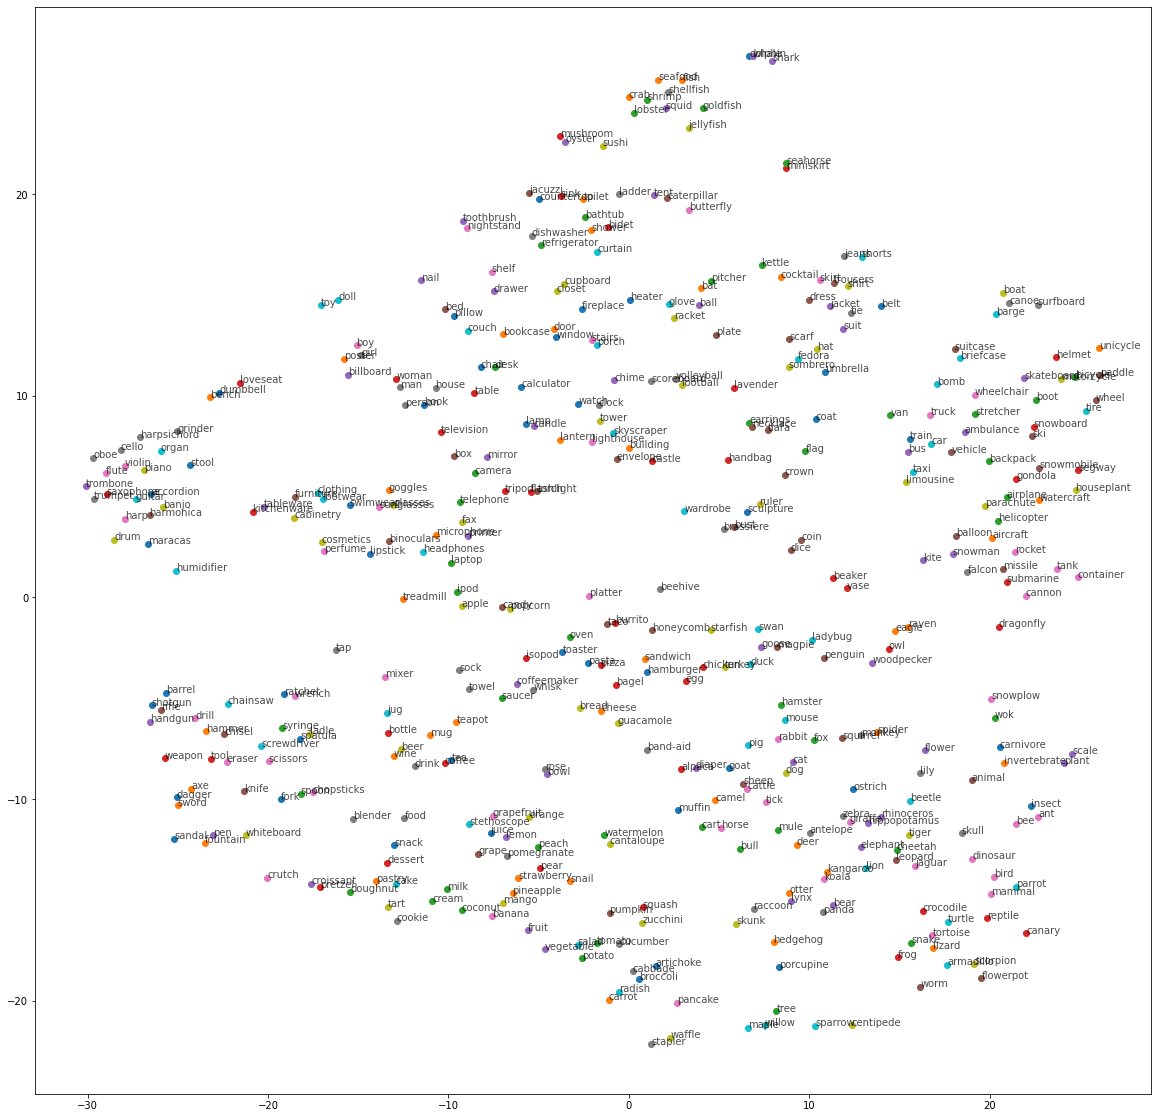

,similarity,emb_sim
similarity,1.000000,0.564286
emb_sim,0.564286,1.000000


,word1,word2,similarity,emb_sim
14,shirt,tiger,0.209367,0.010212
10,helmet,scale,0.278418,-0.081475
3,ball,egg,0.348240,0.093870
13,motorcycle,tank,0.411992,0.295775
1,animal,worm,0.548387,0.309276
0,aircraft,balloon,0.578541,0.663956
2,apple,orange,0.701262,0.421594
11,lion,tiger,0.718794,0.616070
8,drum,piano,0.736325,0.591214
12,maple,tree,0.772849,0.594315


normal text


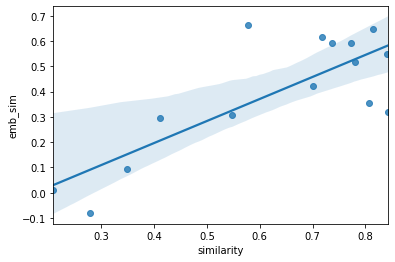

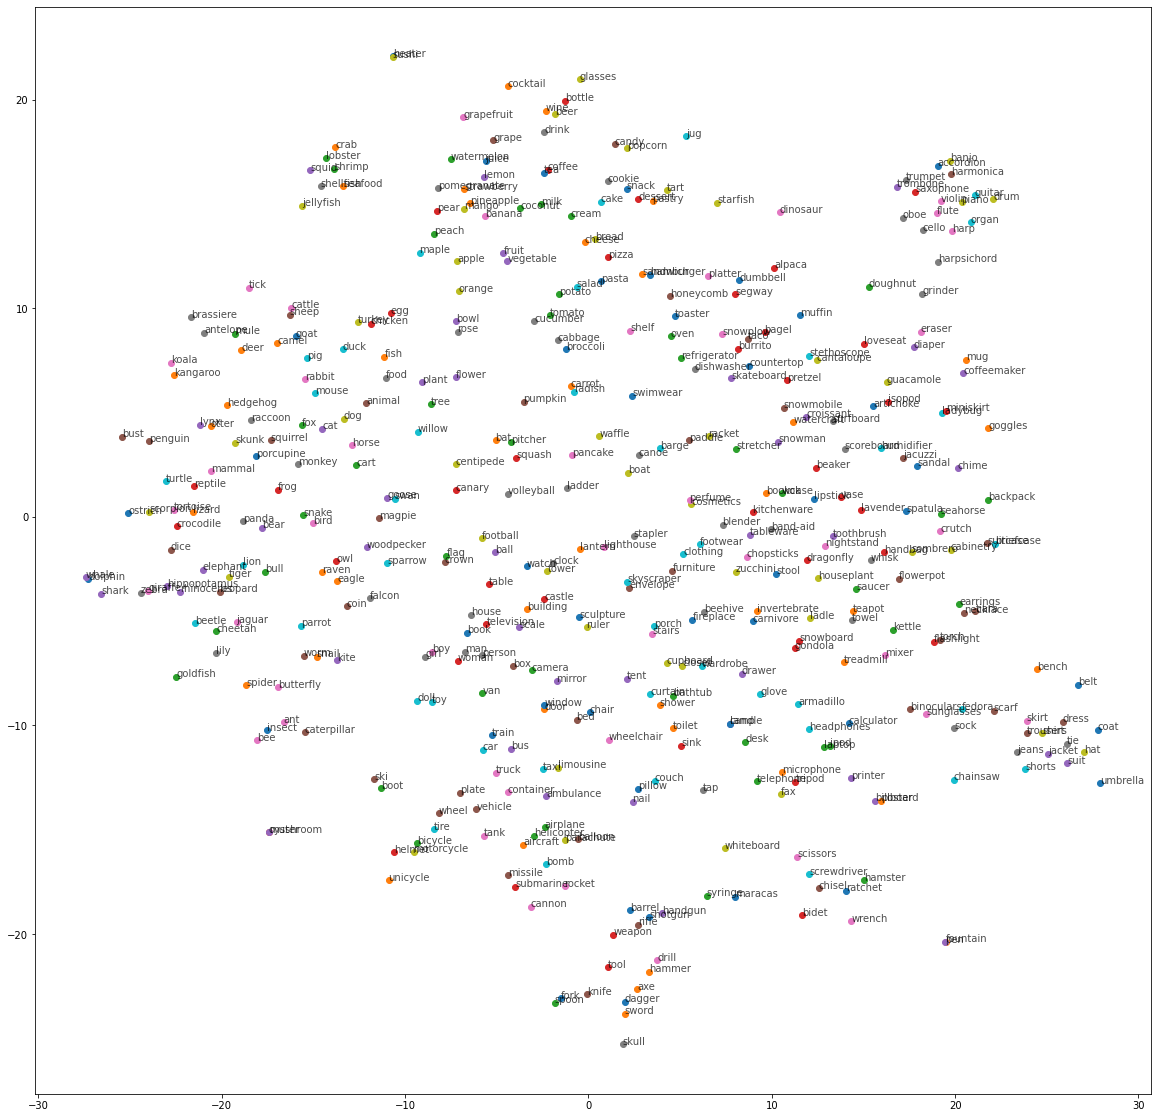

,similarity,emb_sim
similarity,1.000000,0.585714
emb_sim,0.585714,1.000000


,word1,word2,similarity,emb_sim
14,shirt,tiger,0.209367,-0.003799
10,helmet,scale,0.278418,0.065424
3,ball,egg,0.348240,0.249290
13,motorcycle,tank,0.411992,0.347650
1,animal,worm,0.548387,0.334830
0,aircraft,balloon,0.578541,0.484244
2,apple,orange,0.701262,0.640211
11,lion,tiger,0.718794,0.684291
8,drum,piano,0.736325,0.587854
12,maple,tree,0.772849,0.532854


nn image


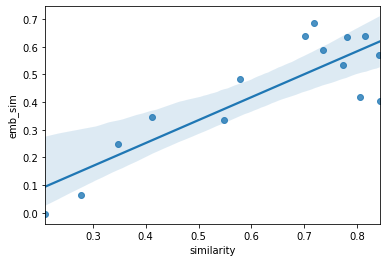

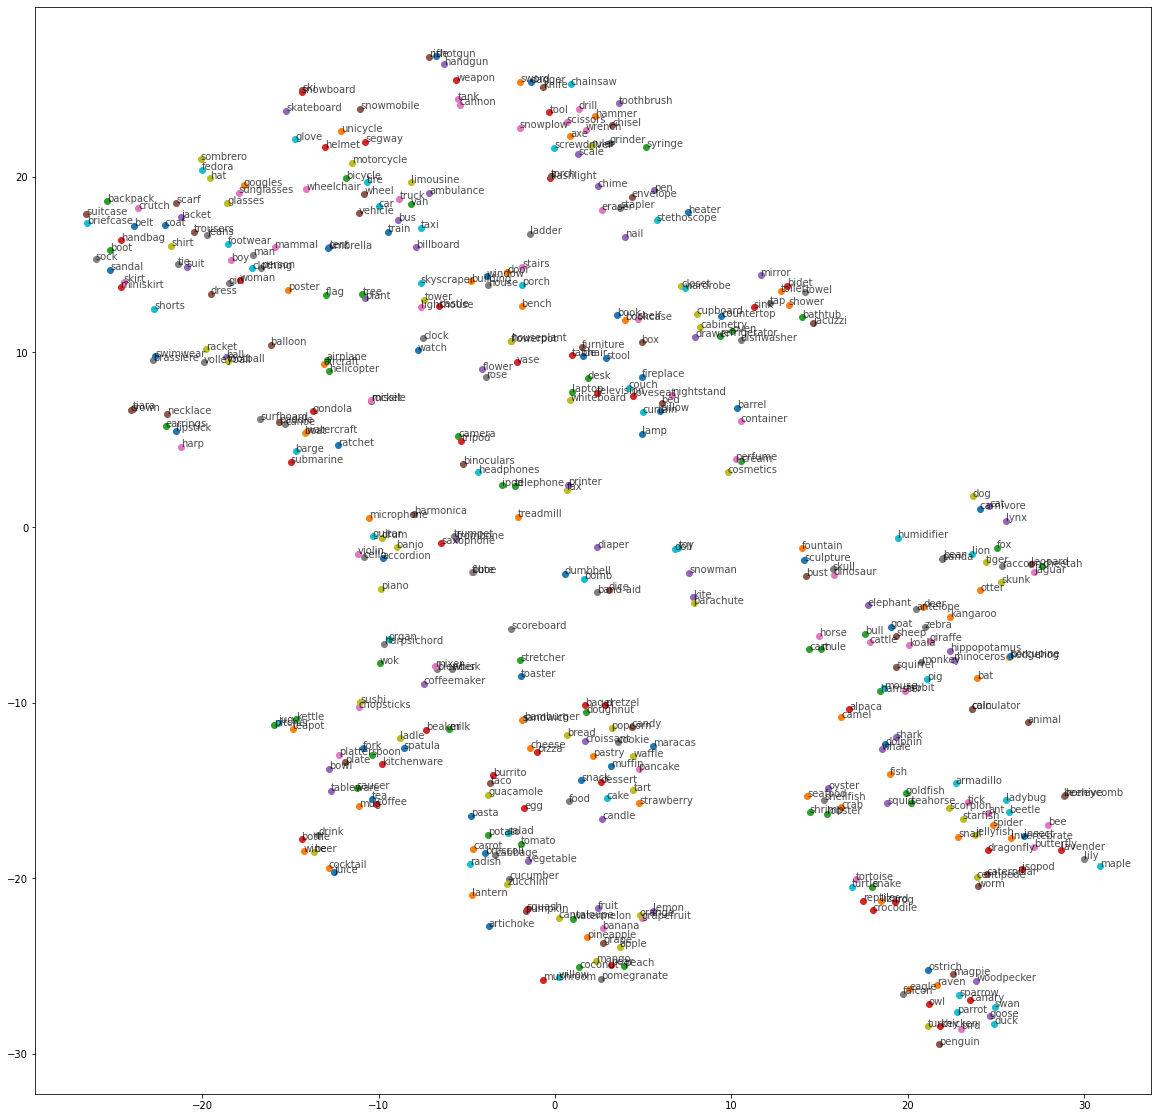

,similarity,emb_sim
similarity,1.000000,0.771429
emb_sim,0.771429,1.000000


,word1,word2,similarity,emb_sim
14,shirt,tiger,0.209367,0.019891
10,helmet,scale,0.278418,-0.273707
3,ball,egg,0.348240,0.069959
13,motorcycle,tank,0.411992,0.473545
1,animal,worm,0.548387,0.280323
0,aircraft,balloon,0.578541,0.559321
2,apple,orange,0.701262,0.670931
11,lion,tiger,0.718794,0.786239
8,drum,piano,0.736325,0.701283
12,maple,tree,0.772849,0.440247


normal image


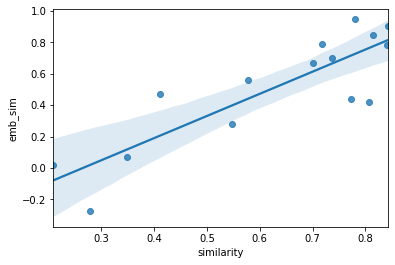

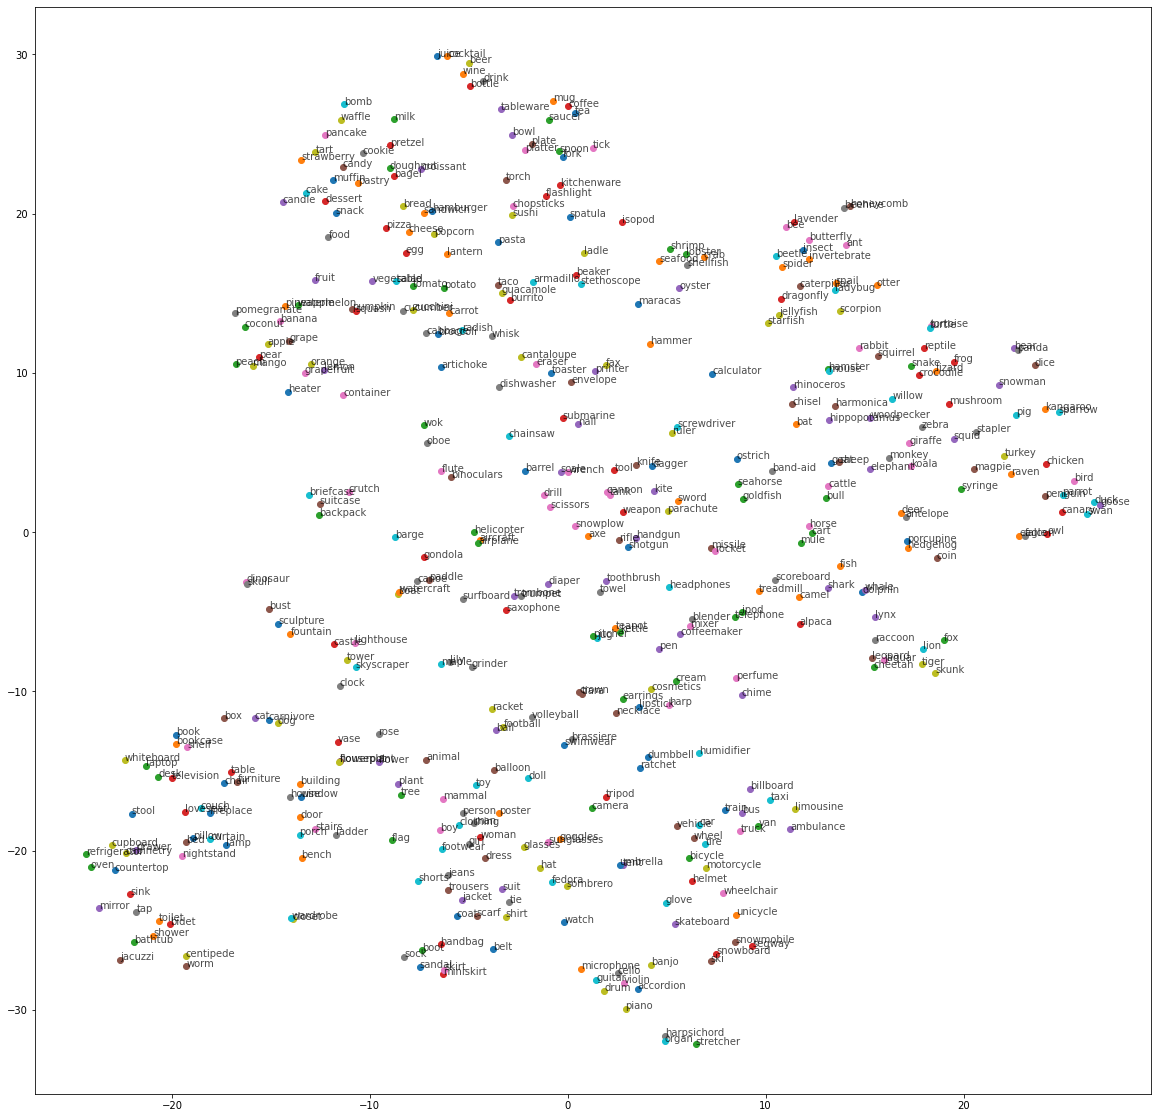

,similarity,emb_sim
similarity,1.000000,0.757143
emb_sim,0.757143,1.000000


,word1,word2,similarity,emb_sim
14,shirt,tiger,0.209367,-0.068199
10,helmet,scale,0.278418,-0.091104
3,ball,egg,0.348240,0.024273
13,motorcycle,tank,0.411992,0.384208
1,animal,worm,0.548387,0.205931
0,aircraft,balloon,0.578541,0.420884
2,apple,orange,0.701262,0.603041
11,lion,tiger,0.718794,0.686892
8,drum,piano,0.736325,0.719590
12,maple,tree,0.772849,0.131286


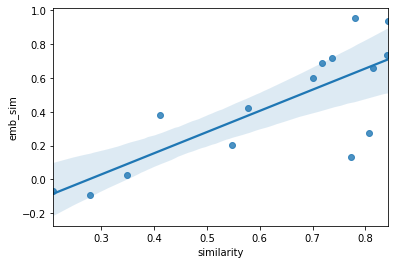

In [7]:
for modality in ['text', 'image']:
    for emb_type in ['nn', 'normal']:
        path = f'{emb_type}/emb_{modality}_dim_30_3.pickle'
        emb = pickle.load(open(path, 'rb'))            
        emb = preprocess_embedding(np.array(list(emb.values())))

        tsne = TSNE(metric='cosine')
        emb_tsne = tsne.fit_transform(emb)

        fig, ax = plt.subplots(figsize=(20, 20))
        
        print(f'{emb_type} {modality}')
        
        ### 2D EMB
        for idx in range(429):
            plt.scatter(*emb_tsne[idx,:])
            plt.annotate(id_to_name[idx], (emb_tsne[idx, 0], emb_tsne[idx, 1]), alpha=0.7)

        plt.show()
        

        #### EVAL
        indices = []

        for i in range(df.shape[0]):
            if (df.loc[i,'word1'] in vocab) and (df.loc[i,'word2'] in vocab):
                indices.append(i)

        df_sim = df.loc[indices,['word1','word2','similarity']].reset_index(drop=True)
        df_sim['similarity'] = df_sim['similarity']/df['similarity'].max()

        emb_sim = []

        for i in range(df_sim.shape[0]):
            word1 = df_sim.loc[i,'word1']
            word2 = df_sim.loc[i,'word2']
            word1_emb = emb[name_to_id[word1],:]
            word2_emb = emb[name_to_id[word2],:]
            emb_sim.append(calc_cosine_sim(word1_emb, word2_emb))
#             emb_sim.append(calc_eucl_sim(word1_emb, word2_emb))

        df_sim['emb_sim'] = emb_sim
        df_sim = df_sim.sort_values(by='similarity')
        display(df_sim.corr(method='spearman'), df_sim)
        sns.regplot(df_sim['similarity'], df_sim['emb_sim'])

# Characterising Embeddings with GMM and BIC
- Higher number of clusters -> Easier to Align
- Achieved with non-negativity in both modalities

nn text, argmin(bic): 6, min(bic): 26025.175500385034
nn text, argmin(bic): 9, min(bic): 25917.2176017938
nn text, argmin(bic): 9, min(bic): 26105.912046131252
nn text, argmin(bic): 12, min(bic): 26002.724578106452


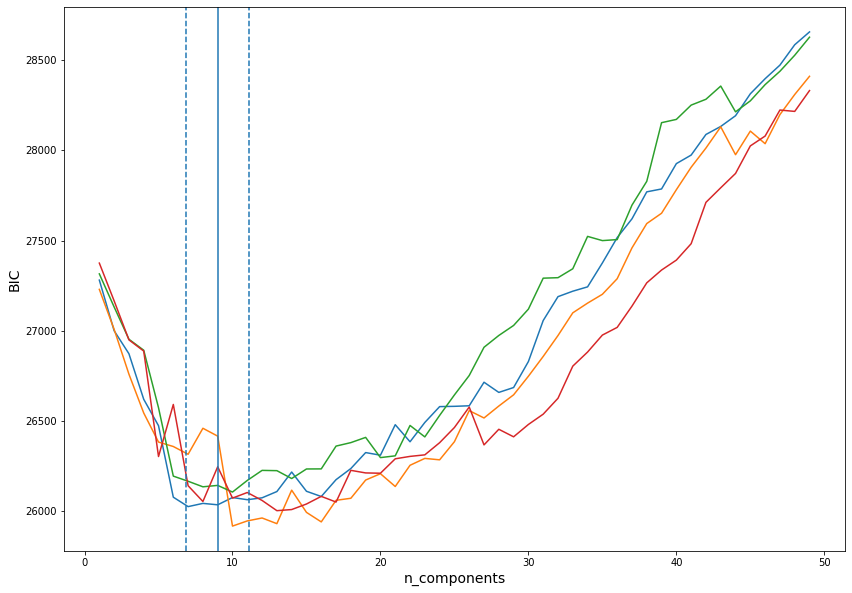

normal text, argmin(bic): 4, min(bic): 30794.894260809575
normal text, argmin(bic): 7, min(bic): 30717.4557912903
normal text, argmin(bic): 5, min(bic): 30697.189636695202
normal text, argmin(bic): 5, min(bic): 30784.842734478814


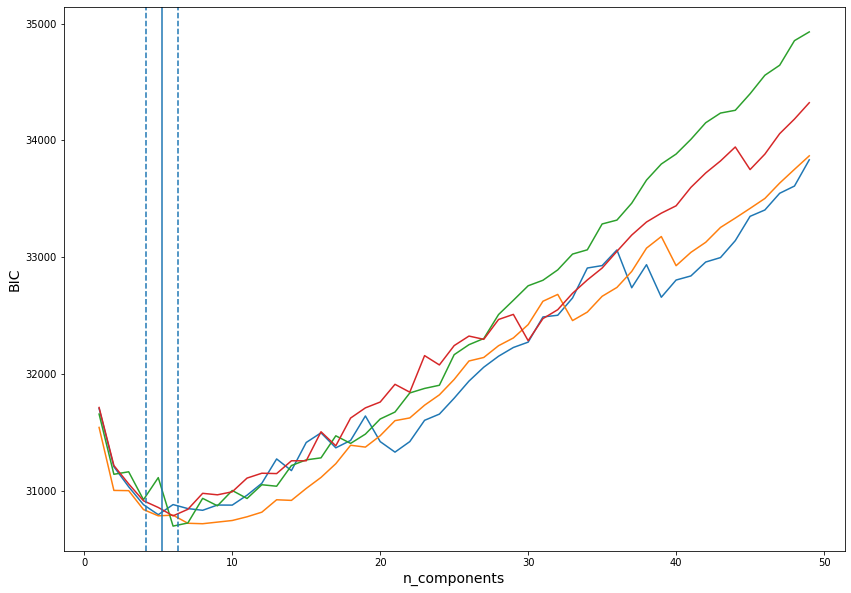

nn image, argmin(bic): 27, min(bic): 26423.764842884506
nn image, argmin(bic): 30, min(bic): 26064.897139497476
nn image, argmin(bic): 18, min(bic): 26451.972619902994
nn image, argmin(bic): 24, min(bic): 26314.128352941567


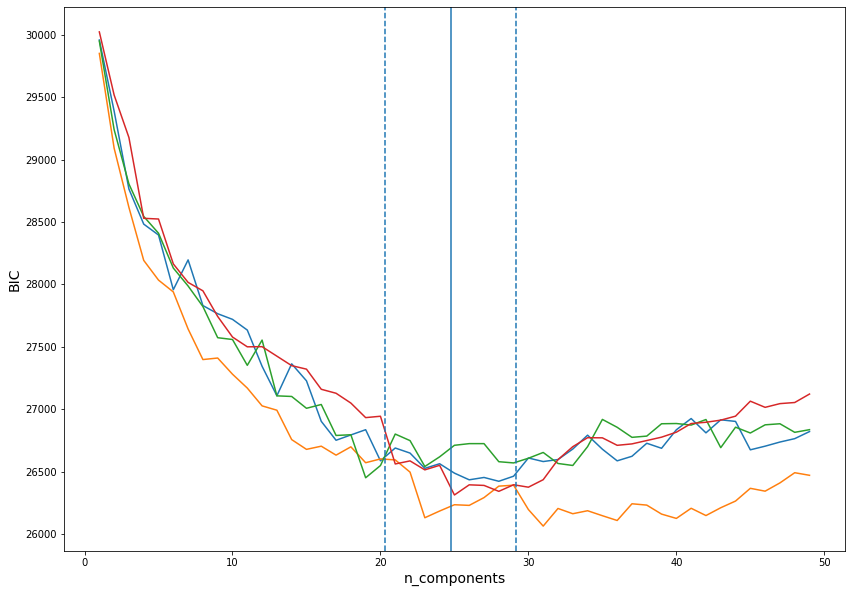

normal image, argmin(bic): 8, min(bic): 32496.077075357134
normal image, argmin(bic): 11, min(bic): 32387.15299780666
normal image, argmin(bic): 7, min(bic): 32176.548413441385
normal image, argmin(bic): 8, min(bic): 32633.54148112269


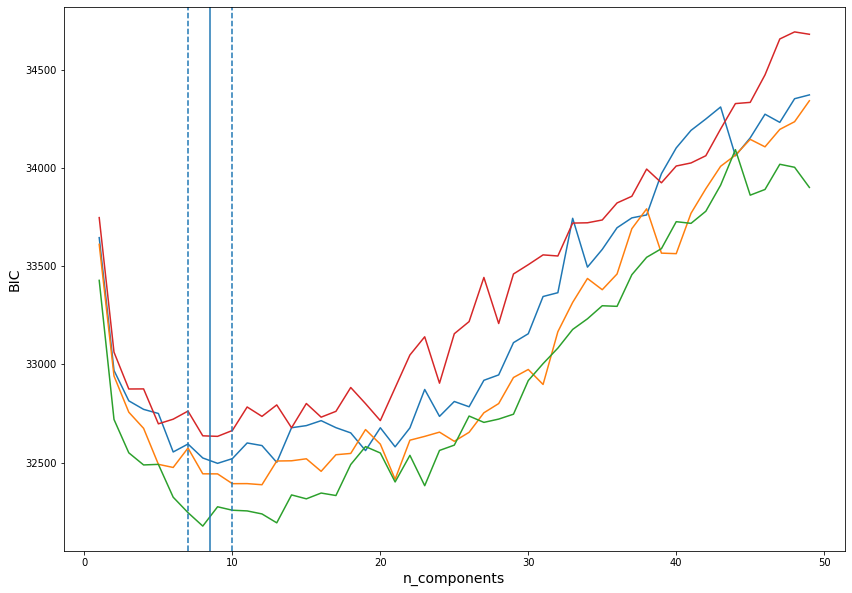

In [148]:
for modality in ['text', 'image']:
    for emb_type in ['nn', 'normal']:
        bic_argmin = []
        plt.figure(figsize=(14,10))
        for i in range(4):
            path = f'{emb_type}/emb_{modality}_dim_30_{i}.pickle'
            emb = pickle.load(open(path, 'rb'))
            X = np.array(list(emb.values()))
            n_components = np.arange(1, 50)
            models = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(X) for n in n_components]
            bic = [m.bic(X) for m in models]
            bic_argmin.append(np.argmin(bic))
            print(f'{emb_type} {modality}, argmin(bic): {np.argmin(bic)}, min(bic): {min(bic)}')
            plt.plot(n_components, bic, label='BIC')
        
        plt.axvline(x=np.mean(bic_argmin))
        plt.axvline(x=np.mean(bic_argmin)-np.std(bic_argmin),ls='--')
        plt.axvline(x=np.mean(bic_argmin)+np.std(bic_argmin), ls='--')  
        plt.xlabel('n_components', fontsize=14);
        plt.ylabel('BIC', fontsize=14);
        plt.show()